In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
marketing_data = pd.read_excel('/Users/joluhergo/Desktop/Ironhack/labs/lab_customer_analysis_r4/marketing_customer_analysis.xlsx')

# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [2]:
marketing_data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [3]:
num_marketing_data = marketing_data.select_dtypes(include='number')
num_marketing_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
marketing_data.select_dtypes(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


# Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

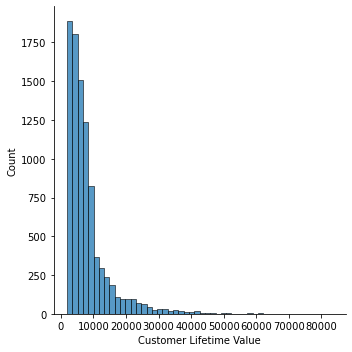

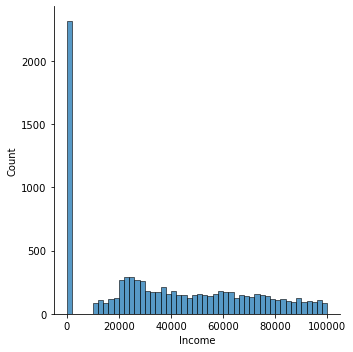

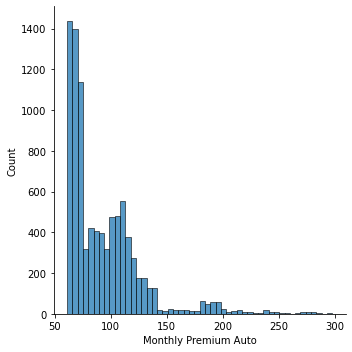

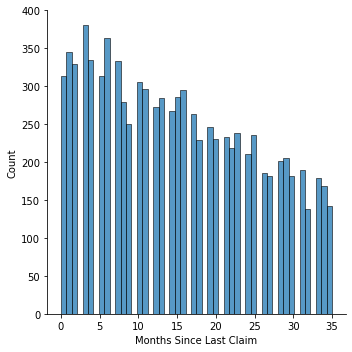

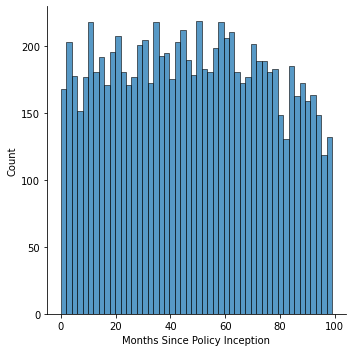

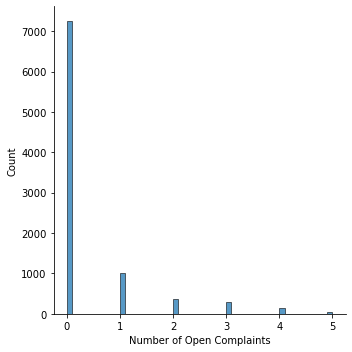

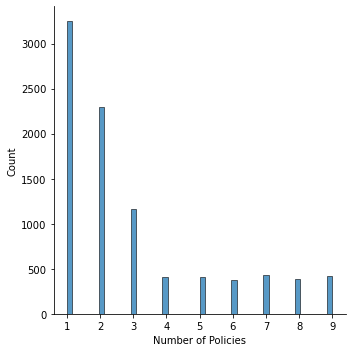

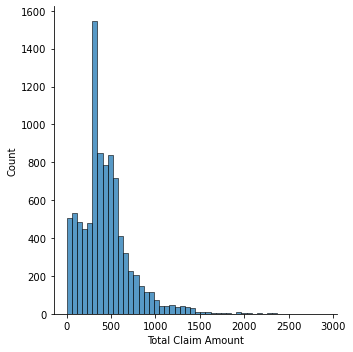

In [5]:
for i in num_marketing_data.columns:
    sns.displot(data= num_marketing_data[i],bins= 50)

Lets check the ones that look more normal

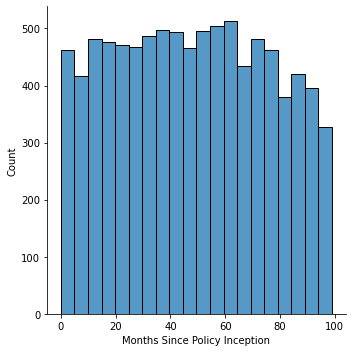

In [6]:
sns.displot(num_marketing_data, x="Months Since Policy Inception",bins=20)

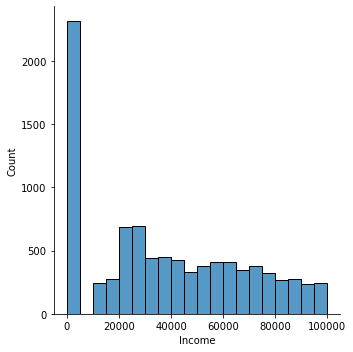

In [7]:
sns.displot(num_marketing_data, x="Income",bins=20)

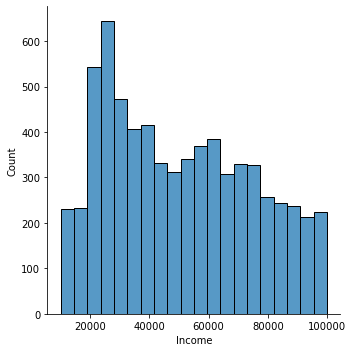

In [8]:
#if we drop 0 values, it seems more like a normal distribution
sns.displot(data= num_marketing_data["Income"][num_marketing_data["Income"]>0], bins=20)


# Use Matplotlib to construct histograms

<AxesSubplot:ylabel='Frequency'>

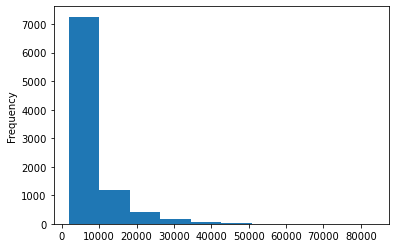

In [9]:
num_marketing_data["Customer Lifetime Value"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

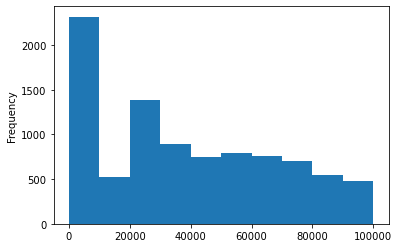

In [10]:
num_marketing_data["Income"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

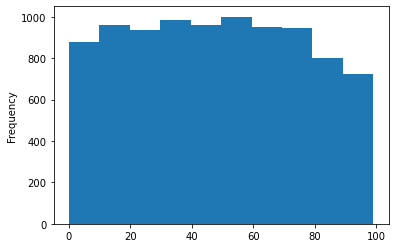

In [11]:
num_marketing_data["Months Since Policy Inception"].plot.hist()

# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [12]:
correlation_matrix = num_marketing_data.corr()
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

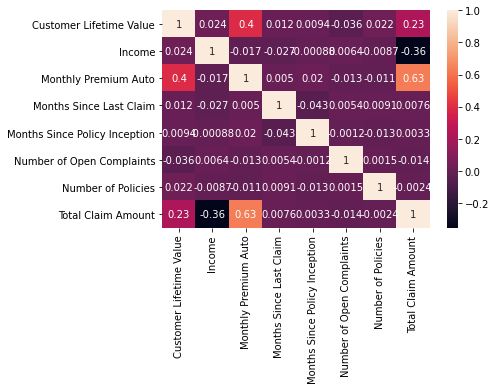

In [13]:
sns.heatmap(correlation_matrix, annot=True)

# Round 5

In [14]:
from sklearn.preprocessing import MinMaxScaler

#Split X and y
y = num_marketing_data["Total Claim Amount"]
X = num_marketing_data.drop(columns = "Total Claim Amount", axis = 1)

#Show X
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [15]:
#Now we define MinMaxScaler and normalize the data
minmax = MinMaxScaler().fit(num_marketing_data)
list = minmax.transform(num_marketing_data)
normalized_data = pd.DataFrame(list, columns =num_marketing_data.columns)

#show the normalize data
normalized_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


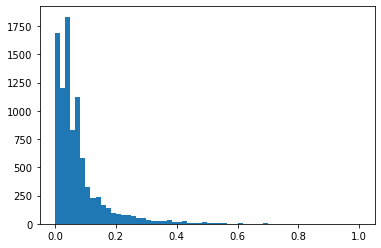

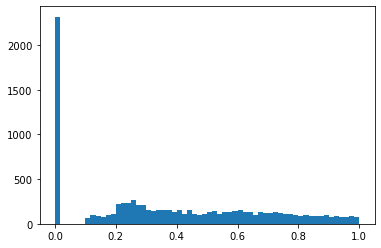

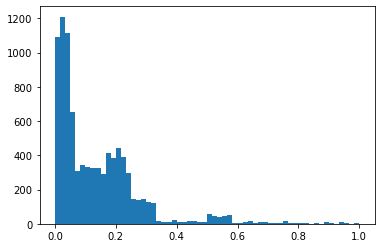

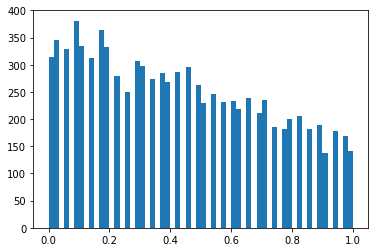

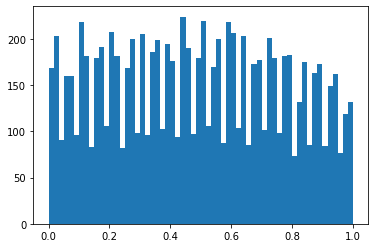

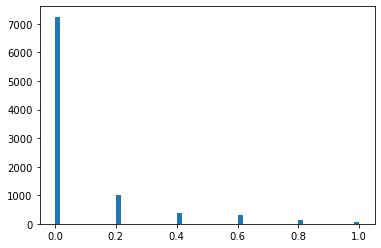

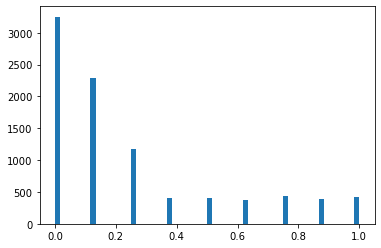

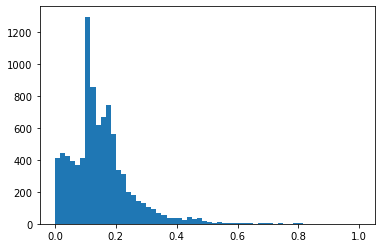

In [16]:
for i in normalized_data.columns:
    plt.hist(x=i, data=normalized_data, bins= 60)
    plt.show()

# Round 6

## Proccessing Data

### One Hot/Label Encoding

#### Let's see the categorical data:

In [17]:
cat_marketing_data = marketing_data.select_dtypes(include='object')
cat_marketing_data.head(3)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


Let's check the values of each column. It could help to choose how to encode it

We cant work neither with "Customer" column nor with "Effective to Date" column because every value is unique and works as an identifier of each row, as we can see:


In [18]:
for col in cat_marketing_data.columns:
    print("Unique values in ", col, "are: \n",  cat_marketing_data[col].unique(), "\n")


Unique values in  Customer are: 
 ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826'] 

Unique values in  State are: 
 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Unique values in  Response are: 
 ['No' 'Yes'] 

Unique values in  Coverage are: 
 ['Basic' 'Extended' 'Premium'] 

Unique values in  Education are: 
 ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Unique values in  Effective To Date are: 
 ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11

In [19]:
cat_marketing_data_filt = cat_marketing_data.drop(columns= ["Customer","Effective To Date"])

We can use Label Encoding for "Coverage" and "Vehicle Size" 
(I think it could be used, for example, if we assign one number from 1 to 3 to each vehicle size, and calculate the mean value, we can see quickly the average size). But it doesn't seem necessary so 

We can use One Hot Encoding for the rest of columns

Let's use One Hot Encode

Import:

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
onehot_matrix = pd.DataFrame()

In [24]:
for col in cat_marketing_data_filt.columns:
    marketing_encoder = OneHotEncoder().fit(cat_marketing_data_filt[[col]])
    marketing_encoded = marketing_encoder.transform(cat_marketing_data_filt[[col]]).toarray()

    onehot_encoded = pd.DataFrame(marketing_encoded, columns=marketing_encoder.categories_)
    onehot_matrix = pd.concat([onehot_matrix, onehot_encoded], axis = 1)

onehot_matrix.head()

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concat DataFrames

Let's create a new DataFrame by concating the numerical data we had normalised before and our new encoded data and display it
 

In [29]:
num_norm_marketing_data = pd.concat([num_marketing_data, onehot_matrix], axis=1)
display(num_norm_marketing_data.head())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,"(Arizona,)","(California,)",...,"(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(SUV,)","(Sports Car,)","(Two-Door Car,)","(Large,)","(Medsize,)","(Small,)"
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Linear Regression

### Train-test split

In [30]:
from sklearn.model_selection import train_test_split

We did it before:
    [
    Split X and y:
    y = num_marketing_data["Total Claim Amount"]
    X = num_marketing_data.drop(columns = "Total Claim Amount", axis = 1)
    ]


Now we are going to do the same with the new processed data:

In [36]:
y = num_norm_marketing_data["Total Claim Amount"]
X = num_norm_marketing_data.drop(columns = "Total Claim Amount", axis = 1)

Now we are separating the recently splited data into two parts, train and test, so we can create the linear regression
model using X_train and y_train, and test it using X_test and y_test.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's take a look on these data frames:

In [59]:
print("X_train's shape: \n", X_train.shape)
print("X_test's shape: \n",X_test.shape)
print("y_train's shape: \n",y_train.shape)
print("y_test's shape: \n",y_test.shape)
display(X_train.head(3))
y_train.head(3)

X_train's shape: 
 (7307, 121)
X_test's shape: 
 (1827, 121)
y_train's shape: 
 (7307,)
y_test's shape: 
 (1827,)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Arizona,)","(California,)","(Nevada,)",...,"(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(SUV,)","(Sports Car,)","(Two-Door Car,)","(Large,)","(Medsize,)","(Small,)"
5123,4768.955924,51144,61,28,32,1,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7738,2827.559570,0,79,30,25,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,2912.892035,81097,74,7,67,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


5123    223.305224
7738    568.800000
214     355.200000
Name: Total Claim Amount, dtype: float64

### Apply linear regresion

First, we have to import linear_model:

In [47]:
from sklearn import linear_model

Now, we define our linear model 

In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [52]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.7743063388482426

Now let's check the accuracy of predictions in our test portion of the data

## Model Validation

We can take a first look and see the predicted data (predictions_test) are quite similar to the real values (y_test):

In [71]:
predictions_test = lm.predict(X_test)
print("Predicted data for the test data: \n", predictions_test)
print("\n Known values (y_test): \n", y_test)

Predicted data for the test data: 
 [191.48275208 463.4150492  452.65239722 ... 199.97317467 522.48361056
 651.41017181]

 Known values (y_test): 
 708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4855    665.931223
1880     33.970000
8472     43.155950
5967    453.600000
7971    852.460341
Name: Total Claim Amount, Length: 1827, dtype: float64


## Description:

### R2 (R-Squared error):
R-Squared shows, in a rate of 0 to 1, the percentage of the data that fit the regression model

In [72]:
print("R2 error: \n", r2_score(y_test, predictions_test))

R2 error: 
 0.7626525506280275


### MSE (Mean Sqaured Error):
MSE of an estimator measures the average of the squares of the errors, that is, the average squared difference between the estimated values and what is estimated (Wikipedia)

In [64]:
from sklearn.metrics import mean_squared_error

In [73]:
mse = mean_squared_error(y_test, predictions_test)
print("MSE: \n", mse)

MSE: 
 18871.74272332501


We can see it's a high number, it may indicate: 
either the variance or the bias in your estimator is large
or the model is not well specified
In this case, I think the problem might be that the data is not scaled (there is a high variance), so R-Squared tells more about the quality of the model.
Lets check how the variance is:

In [81]:
print("We can see the variance of the tested data: \n",
    y_test.var(), 
    "\n is high, so that could be the reason why MSE is a high number ")

We can see the variance of the tested data: 
 79554.58460248151 
 is high, so that could be the reason why MSE is a high number 


### RMSE: Root-Mean-Square-Error (RMSE) or Root-Mean-Squared-Deviation(RMSD):
The RMSE is a measure of the differences between values predicted by a model or an estimator and the values observed.
The standard deviation is the squared root of the variance, and the RMSD( or RMSE) is te squared root of MSE:

In [85]:
import math
rmse = math.sqrt(mse)
print("RMSE: \n", rmse)


RMSE: 
 137.37446168529655


### MAE: Mean Absolute Error

mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon

In [88]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print("MAE: \n", mae)

MAE: 
 94.53517127124968


# Round 7

# Final Round